In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math

In [ ]:
s2_mel = pd.read_csv("/content/Segment2_MelEnergy.csv",header = None)
s2_ste = pd.read_csv("/content/Segment2_STEnergy.csv",header = None)
s2_gt = pd.read_csv("/content/Segment2_VAD_GT.csv",header = None)

In [ ]:
s2_mel.shape, s2_ste.shape, s2_gt.shape

((256, 1), (256, 1), (256, 1))

In [ ]:
s3_mel = pd.read_csv("/content/Segment3_MelEnergy.csv",header = None)
s3_ste = pd.read_csv("/content/Segment3_STEnergy.csv",header = None)
s3_gt = pd.read_csv("/content/Segment3_VAD_GT.csv",header = None)

s3_mel.shape, s3_ste.shape, s3_gt.shape

((275, 1), (275, 1), (275, 1))

In [ ]:
def separate_features(value, gt):
  speech, nonspeech = [], []
  for i in range(len(gt)):
    if gt[i] == 1:
      speech.append(value[i])
    else:
      nonspeech.append(value[i])
  return np.array(speech), np.array(nonspeech)

In [ ]:
def cdf(x, mean, sd):
  f1 = math.erf(((x-mean)/sd)/np.sqrt(2))
  return (1+f1)/2

In [ ]:
def pdf(x, mean, sd):
  a = 1/(sd*np.sqrt(2*np.pi))
  b = np.exp(-0.5*((x-mean)/sd)**2)
  return b/a

In [ ]:
def classification(y, y_pred):
  TP, FP, TN, FN = 0, 0, 0, 0
  for i in range(len(y)):
    if y[i] == 1 and y_pred[i] == 1:
      TP = TP + 1
    elif y[i] == 0 and y_pred[i] == 1:
      FP = FP + 1
    elif y[i] == 0 and y_pred[i] == 0:
      TN = TN + 1
    elif y[i] == 1 and y_pred[i] == 0:
      FN = FN + 1
  return TP, FP, TN, FN

In [ ]:
def tpr(TP, FN):
  return TP/(TP+FN)

def fpr(TN, FP):
  return TN/(TN+FP)

In [ ]:
ste_speech, ste_nonspeech = separate_features(s2_ste[0], s2_gt[0])
prior_STEspeech = len(ste_speech) / len(s2_ste[0])
prior_STEnonspeech = len(ste_nonspeech) / len(s2_ste[0])

prior_STEspeech, prior_STEnonspeech

(0.43359375, 0.56640625)

In [ ]:
mean_ste_s = np.mean(ste_speech)
var_ste_s = np.var(ste_speech)
print('Speech:\nmean = {}\nvariance = {}'.format(mean_ste_s, var_ste_s))

Speech:
mean = 0.1204343233963964
variance = 0.02768125923531732


In [ ]:
mean_ste_ns = np.mean(ste_nonspeech)
var_ste_ns = np.var(ste_nonspeech)
print('Non Speech:\nmean = {}\nvariance = {}'.format(mean_ste_ns, var_ste_ns))

Non Speech:
mean = 0.05309067413793104
variance = 0.001294403516656372


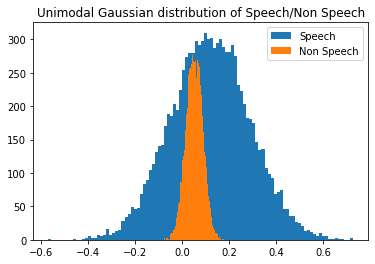

In [ ]:
plot_ste_s = np.random.normal(mean_ste_s, np.sqrt(var_ste_s), 10000)
plot_ste_ns = np.random.normal(mean_ste_ns, np.sqrt(var_ste_ns), 10000)

plt.hist(plot_ste_s, bins=100)
plt.hist(plot_ste_ns, bins=100)

plt.title('Unimodal Gaussian distribution of Speech/Non Speech')
plt.legend(['Speech', 'Non Speech'])
plt.show()

Testing for STE Energy

In [ ]:
p_ste = []
for xi in s3_ste[0]:
  prob_s = pdf(xi, mean_ste_s, np.sqrt(var_ste_s))*prior_STEspeech
  prob_ns = pdf(xi, mean_ste_ns, np.sqrt(var_ste_ns))*prior_STEnonspeech
  p_ste.append(prob_s/(prob_s + prob_ns))


In [ ]:
threshold_ste = np.random.uniform(0, 1, size=(1000,))
threshold_ste = sorted(threshold_ste)

In [ ]:
TP_ste, FP_ste, TN_ste, FN_ste = [], [], [], []
for t in threshold_ste:
  y_predicted = [1 if i > t else 0 for i in p_ste]
  u, v, w, z = classification(s3_gt[0], y_predicted)
  TP_ste.append(u)
  FP_ste.append(v)
  TN_ste.append(w)
  FN_ste.append(z)

In [ ]:
print('CONFUSION MATRIX')
print([[TP_ste[10], FP_ste[10]],[FN_ste[10], TN_ste[10]]])

CONFUSION MATRIX
[[158, 117], [0, 0]]


In [ ]:
TPR_ste, FPR_ste = [], []
for i in range(len(threshold_ste)):
  TPR_ste.append(tpr(TP_ste[i], FN_ste[i]))
  FPR_ste.append(1 - fpr(TN_ste[i], FP_ste[i]))

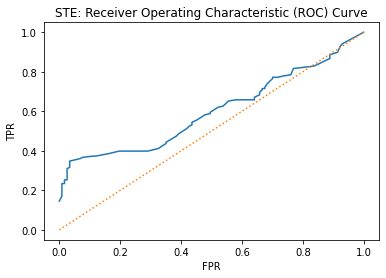

In [ ]:
plt.plot(FPR_ste, TPR_ste)
plt.plot([0, 1], [0, 1], linestyle=':')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('STE: Receiver Operating Characteristic (ROC) Curve')
plt.show()

MEL Energy

In [ ]:
mel_speech, mel_nonspeech = separate_features(s2_mel[0], s2_gt[0])

In [ ]:
mean_mel_s = np.mean(mel_speech)
var_mel_s = np.var(mel_speech)
print('Speech:\nmean = {}\nvariance = {}'.format(mean_mel_s, var_mel_s))

Speech:
mean = 0.6100466457117119
variance = 0.022868307214661175


In [ ]:
mean_mel_ns = np.mean(mel_nonspeech)
var_mel_ns = np.var(mel_nonspeech)
print('Non Speech:\nmean = {}\nvariance = {}'.format(mean_mel_ns, var_mel_ns))

Non Speech:
mean = 0.4586546361379311
variance = 0.005185428142352255


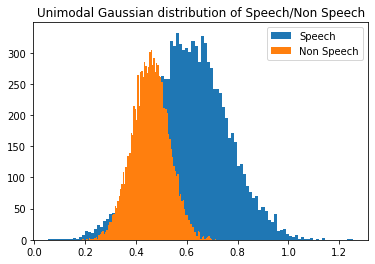

In [ ]:
plot_mel_s = np.random.normal(mean_mel_s, np.sqrt(var_mel_s), 10000)
plot_mel_ns = np.random.normal(mean_mel_ns, np.sqrt(var_mel_ns), 10000)

plt.hist(plot_mel_s, bins=100)
plt.hist(plot_mel_ns, bins=100)

plt.title('Unimodal Gaussian distribution of Speech/Non Speech')
plt.legend(['Speech', 'Non Speech'])
plt.show()

Testing for MEL Energy

In [ ]:
p_mel = []
for xi in s3_mel[0]:
  prob_s = pdf(xi, mean_mel_s, np.sqrt(var_mel_s))*prior_STEspeech
  prob_ns = pdf(xi, mean_mel_ns, np.sqrt(var_mel_ns))*prior_STEnonspeech
  p_mel.append(prob_s/(prob_s + prob_ns))
 

(0.4568031124318552, 0.9999999999907603)

In [ ]:
threshold_mel = np.random.uniform(0, 1, size=(1000,))
threshold_mel = sorted(threshold_mel)

In [ ]:
TP_mel, FP_mel, TN_mel, FN_mel = [], [], [], []
for t in threshold_mel:
  y_predicted = [1 if i > t else 0 for i in p_mel]
  u, v, w, z = classification(s3_gt[0], y_predicted)
  TP_mel.append(u)
  FP_mel.append(v)
  TN_mel.append(w)
  FN_mel.append(z)

In [ ]:
print('CONFUSION MATRIX')
print([[TP_mel[10], FP_mel[10]],[FN_mel[10], TN_mel[10]]])

CONFUSION MATRIX
[[158, 117], [0, 0]]


In [ ]:
TPR_mel, FPR_mel = [], []
for i in range(len(threshold_mel)):
  TPR_mel.append(tpr(TP_mel[i], FN_mel[i]))
  FPR_mel.append(1 - fpr(TN_mel[i], FP_mel[i]))

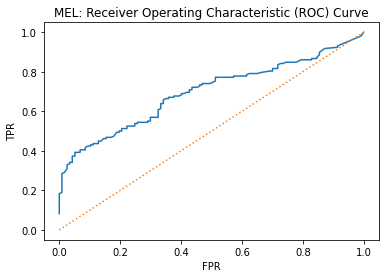

In [ ]:
plt.plot(FPR_mel, TPR_mel)
plt.plot([0, 1], [0, 1], linestyle=':')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('MEL: Receiver Operating Characteristic (ROC) Curve')
plt.show()

Comparison of STE and MEL

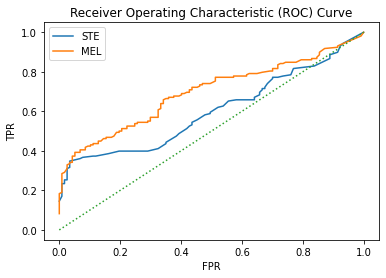

In [ ]:
plt.plot(FPR_ste, TPR_ste)
plt.plot(FPR_mel, TPR_mel)
plt.plot([0, 1], [0, 1], linestyle=':')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['STE', 'MEL'])
plt.show()